# Intro to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data.Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 Dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to only use 2 classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


🔑 **Note**: We start with a smaller dataset so we can experiment quickly and figure out what works (or doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-22 18:49:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 142.251.161.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   222MB/s    in 0.5s    

2023-08-22 18:49:47 (222 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any ML project is to become one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory & list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug 22 18:49 .
drwxr-xr-x 1 root root 4096 Aug 22 18:49 ..
drwxr-xr-x 4 root root 4096 Aug 22 18:49 test
drwxr-xr-x 4 root root 4096 Aug 22 18:49 train


In [ ]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape:{img.shape}") # Show the shape of the image

  return img


['2019441.jpg']
Image Shape:(512, 512, 3)


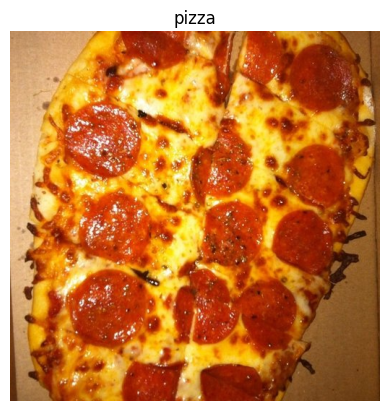

In [ ]:
# View random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")


In [ ]:
# Images we've imported and plotted are actually giant arrays /tensors of different pixel values
import tensorflow as tf
import numpy as np
tf.constant(img)



<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[179, 131,  85],
        [186, 138,  92],
        [191, 143,  97],
        ...,
        [131,  77,  31],
        [133,  79,  33],
        [134,  80,  34]],

       [[182, 134,  88],
        [189, 141,  95],
        [195, 147, 101],
        ...,
        [130,  76,  30],
        [129,  75,  29],
        [130,  76,  30]],

       [[181, 133,  87],
        [187, 139,  93],
        [193, 145,  99],
        ...,
        [129,  75,  29],
        [129,  75,  29],
        [131,  77,  31]],

       ...,

       [[ 93,  44,  14],
        [ 93,  44,  14],
        [ 92,  45,  17],
        ...,
        [ 96,  56,  20],
        [ 87,  49,  13],
        [ 78,  40,   4]],

       [[ 93,  44,  14],
        [ 94,  45,  15],
        [ 92,  45,  17],
        ...,
        [ 98,  58,  22],
        [ 89,  51,  15],
        [ 80,  42,   6]],

       [[ 93,  44,  14],
        [ 94,  45,  15],
        [ 92,  45,  17],
        ...,
        [ 93,  53,  1

In [ ]:
# View image shape
img.shape # returns width, height, color channels

(512, 512, 3)

🔑 **Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 & 1.Therefore, one of the most common preprocessing steps for working with images is to **scale** (or **normalize**) their pixel values by dividing the image arrays by 255(since 255 is the max pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.70196078, 0.51372549, 0.33333333],
        [0.72941176, 0.54117647, 0.36078431],
        [0.74901961, 0.56078431, 0.38039216],
        ...,
        [0.51372549, 0.30196078, 0.12156863],
        [0.52156863, 0.30980392, 0.12941176],
        [0.5254902 , 0.31372549, 0.13333333]],

       [[0.71372549, 0.5254902 , 0.34509804],
        [0.74117647, 0.55294118, 0.37254902],
        [0.76470588, 0.57647059, 0.39607843],
        ...,
        [0.50980392, 0.29803922, 0.11764706],
        [0.50588235, 0.29411765, 0.11372549],
        [0.50980392, 0.29803922, 0.11764706]],

       [[0.70980392, 0.52156863, 0.34117647],
        [0.73333333, 0.54509804, 0.36470588],
        [0.75686275, 0.56862745, 0.38823529],
        ...,
        [0.50588235, 0.29411765, 0.11372549],
        [0.50588235, 0.29411765, 0.11372549],
        [0.51372549, 0.30196078, 0.12156863]],

       ...,

       [[0.36470588, 0.17254902, 0.05490196],
        [0.36470588, 0.17254902, 0.05490196],
        [0.36078431, 0

## End-to-end example

Let's build a convolutional neural network to find patterns in the images, specifically to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf #Changed ImageDataGenerator code! Has been updated!
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess data (Get all pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories & turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data

In [ ]:
valid_data

In [ ]:

# Build a CNN Model(same as the Tiny VGG on the CNN explainer website)
import tensorflow as tf

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 11s 171ms/step - loss: 0.5660 - accuracy: 0.6927 - val_loss: 0.4052 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4592 - accuracy: 0.7987 - val_loss: 0.5050 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4193 - accuracy: 0.8247 - val_loss: 0.3780 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3564 - accuracy: 0.8560 - val_loss: 0.3500 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 6s 116ms/step - loss: 0.2822 - accuracy: 0.8907 - val_loss: 0.3244 - val_accuracy: 0.8700


🔑 **Note:** If runtime takes long, go to: Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (may have to rerun some cells above).

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

🧰** Exercise:** Read and play around with the CNN in:
https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate a model from previous section to see if works with image data.
The model we're building is from the TensorFlow playground:
https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.64243&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
import tensorflow as tf

# Set Seed

tf.random.set_seed(42)

# Create model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

# Compile model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 153ms/step - loss: 0.7234 - accuracy: 0.6507 - val_loss: 0.5554 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.5651 - accuracy: 0.7113 - val_loss: 0.5632 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 5s 117ms/step - loss: 0.5175 - accuracy: 0.7473 - val_loss: 0.5365 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4418 - accuracy: 0.8060 - val_loss: 0.5636 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.3865 - accuracy: 0.8353 - val_loss: 0.5100 - val_accuracy: 0.7680


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, None, None, 4)     16        
                                                                 
 dense_10 (Dense)            (None, None, None, 4)     20        
                                                                 
 flatten_7 (Flatten)         (None, None)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 200705    
                                                                 
Total params: 200,741
Trainable params: 200,741
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

# Set Seed

tf.random.set_seed(42)

# Create model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

# Compile model

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 5.1787 - accuracy: 0.5567 - val_loss: 0.7964 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.9012 - accuracy: 0.6860 - val_loss: 0.5276 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6039 - accuracy: 0.7267 - val_loss: 0.6014 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4859 - accuracy: 0.7807 - val_loss: 0.4313 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4756 - accuracy: 0.7887 - val_loss: 0.8049 - val_accuracy: 0.6420


In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15000000/31000

483.8709677419355

🔑**Note:** Think of trainable parameters as **patterns a model can learn from data.** Sometimes more is better, and in lots of cases it is, however, the difference here is the 2 different styles of model what we're using. Where, a series of dense layers has a number of different learnable parameters connected to each other and thus higher possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So, even though there are less learnable parameters in our CNN, these are often more helpful in desciphering between different **features** in an image.

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Binary Classification Breakdown:

1. Become one with the data (visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, main step being scaling/normalising & turning our data into batches).
3. Created a model (start with a baseline e.g. Food101 original paper benchmark).
4. Fit the model
5. Evaluate the model
6. Adjust different parameters & improve the model ( try to beat our baseline).
7. Repeat until satisfied (eperiment, experiment, experiment).

### 1. Become one with the Data

['1068975.jpg']
Image Shape:(512, 306, 3)
['317861.jpg']
Image Shape:(512, 382, 3)


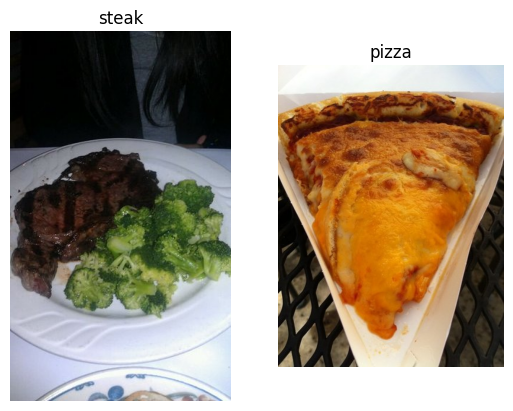

In [ ]:
# Visualize Data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (prepare it for a model)


In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.

It does this because:

1. 10,000 images+ might not fit into the memory of your processor(GPU).\
2. Trying to learn the patterns of 10,000 images in one hit could result in the model's inability to learn very well.

Why 32?
Because 32 is good for your health...https://twitter.com/ylecun/status/989610208497360896?s=20

In [ ]:
# Create train and test generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels= train_data.next() # get the nest batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How any batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model ( start with a baseline)

A baseline is a relatively simple model or existing result that is set up when beginning a machine learning experiment.
And as you keep experimenting, you try to beat the baseline.

🔑 **Note:** In DL, there is almost an infinite nr. of architectures you could create. So, one of the best ways to get started is use something simple first, and see if works on the data, and then introduce complexity as required. (e.g. look up which current model is performing best in the field for your problem).


In [ ]:
# Make the creation of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D ,Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (This will be our baseline a 3 layer CNN)
model_4 = Sequential([
    Conv2D(filters=10, # is the number of sliding windows going across an input.(higher= more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # The size of the step the sliding window takes across an input
           padding="valid", # If "same", output shape is same as input shape, if "valid", output shape gets compressed.
           activation="relu",
           input_shape=(224, 224, 3)), #Input layer (specify input_shape)

    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])


🧰 Exercise: Go through the CNN explainer website for 10 to 20 minutes. https://poloclub.github.io/cnn-explainer/

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get summary of model
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_9 (Flatten)         (None, 475240)            0         
                                                                 
 dense_16 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4.Fit the model


In [ ]:
# Check lengths of training and test generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 153ms/step - loss: 0.7562 - accuracy: 0.4993 - val_loss: 0.6392 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.5298 - accuracy: 0.7593 - val_loss: 0.4455 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3425 - accuracy: 0.8607 - val_loss: 0.3774 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.1907 - accuracy: 0.9360 - val_loss: 0.3738 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.0749 - accuracy: 0.9793 - val_loss: 0.3886 - val_accuracy: 0.8440


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.3244 - accuracy: 0.8700


[0.32440751791000366, 0.8700000047683716]

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### 5. Evaluating our model



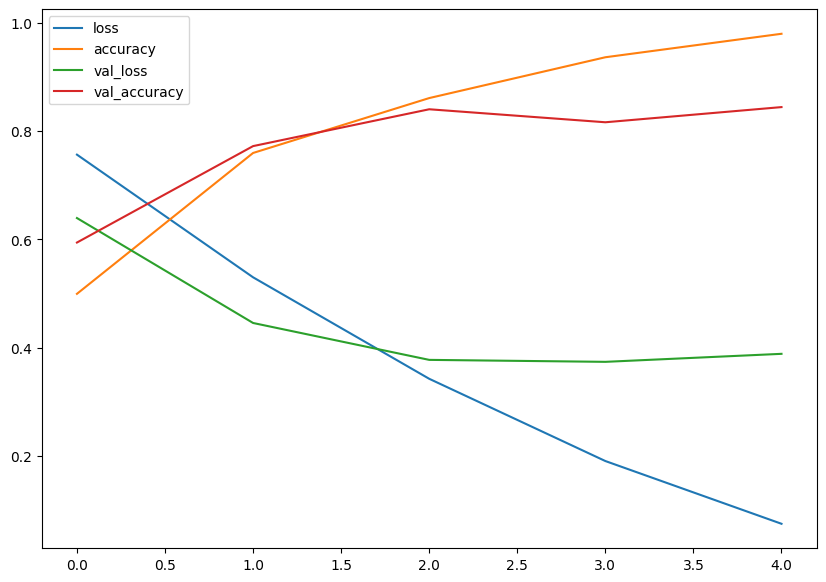

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));


In [ ]:
# Plot validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  #Plot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting ** the training dataset. This means it's learning the patterns in the training dataset **Too Well** and thus, the model's ability to generalize to unseen data will be diminished.

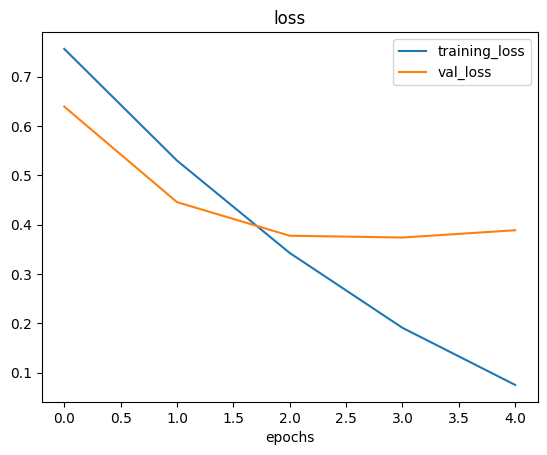

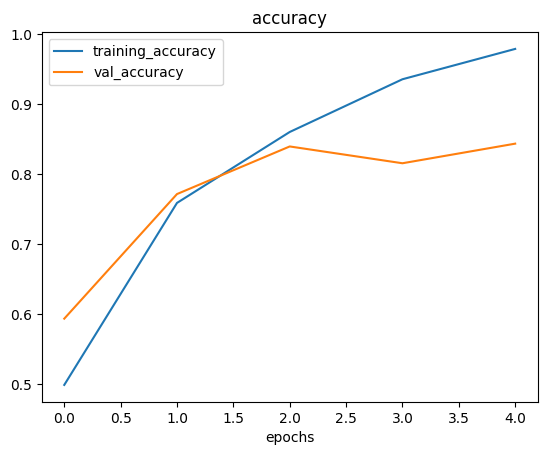

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑**Note:** Ideally the 2 loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be overfitting.

### 6. Adjust model parameters

Fitting an ML model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another Dense layer to the output of out Flattened layer

Ways to reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model (new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics=["accuracy"])



In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 132ms/step - loss: 0.6140 - accuracy: 0.6740 - val_loss: 0.5312 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4892 - accuracy: 0.7853 - val_loss: 0.4342 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4507 - accuracy: 0.7973 - val_loss: 0.3862 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4087 - accuracy: 0.8173 - val_loss: 0.3558 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3758 - accuracy: 0.8413 - val_loss: 0.3533 - val_accuracy: 0.8380


In [ ]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)     

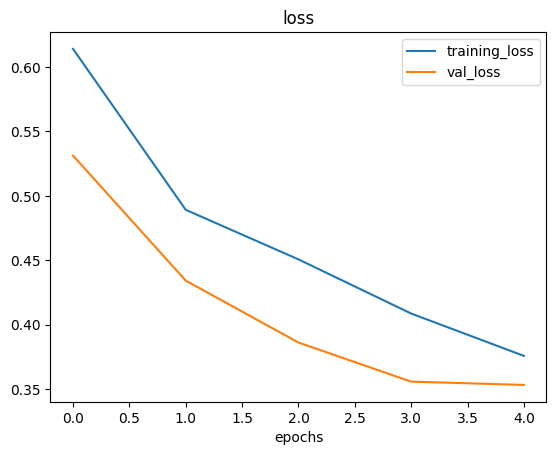

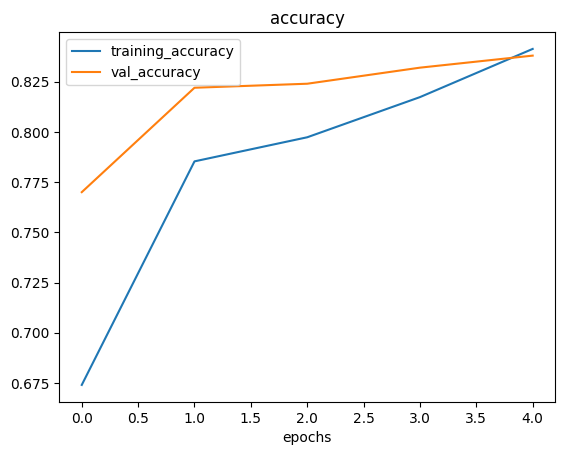

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #how much to you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move image around on x-axis
                                             height_shift_range=0.2, # move image aaround on y-axis
                                             horizontal_flip=True) # do you want to flip an image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

❓**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...


In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purposes only


# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


🔑**Note:** Data augmentation is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.

Let's visualize some augmented data!

In [ ]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels aren't augmented, Only data (images)


Showing image number:8


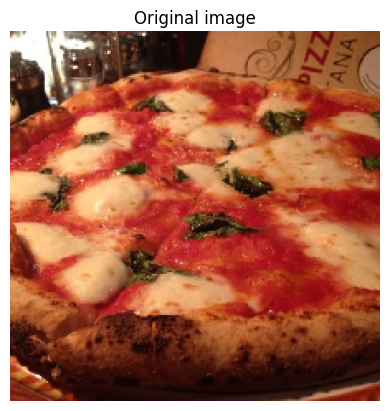

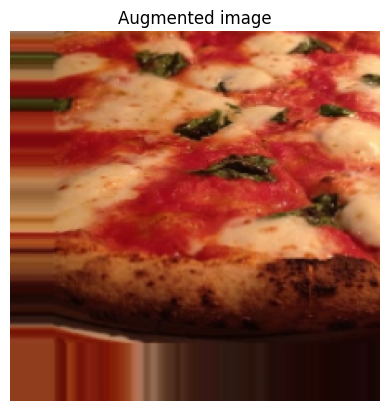

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Let's build a model and see how it learns on augmented data.

In [ ]:
# create model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

# Fit model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 429ms/step - loss: 0.8968 - accuracy: 0.4847 - val_loss: 0.6968 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6939 - accuracy: 0.5387 - val_loss: 0.6732 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6895 - accuracy: 0.5367 - val_loss: 0.6459 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 20s 421ms/step - loss: 0.6819 - accuracy: 0.5867 - val_loss: 0.6280 - val_accuracy: 0.5980
Epoch 5/5
47/47 [==============================] - 21s 459ms/step - loss: 0.6383 - accuracy: 0.6360 - val_loss: 0.5200 - val_accuracy: 0.7800


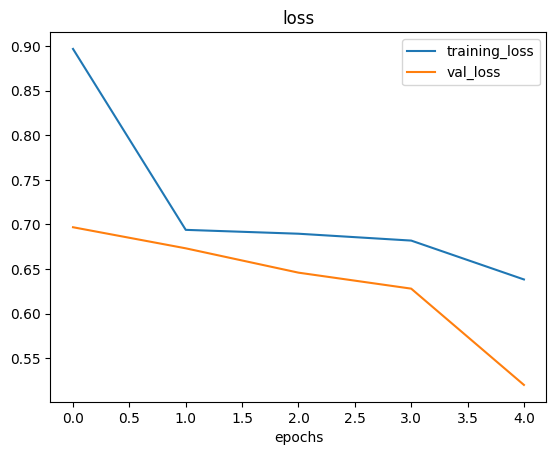

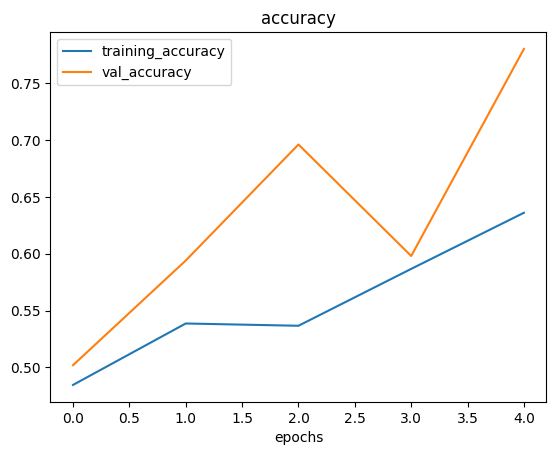

In [ ]:
# Check model's training curves

plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (same as above) on it and see what happens.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # Shuffle data this time




Augmented training data:
Found 1500 images belonging to 2 classes.


In [ ]:
# create model (same as model_5)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

# Fit model
history_7 = model_7.fit(train_data_augmented_shuffled, # fitting on augmented & shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 424ms/step - loss: 0.6741 - accuracy: 0.5787 - val_loss: 0.6055 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5798 - accuracy: 0.6993 - val_loss: 0.4457 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 20s 430ms/step - loss: 0.5121 - accuracy: 0.7553 - val_loss: 0.4064 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 25s 545ms/step - loss: 0.4826 - accuracy: 0.7693 - val_loss: 0.3619 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4805 - accuracy: 0.7773 - val_loss: 0.3726 - val_accuracy: 0.8420


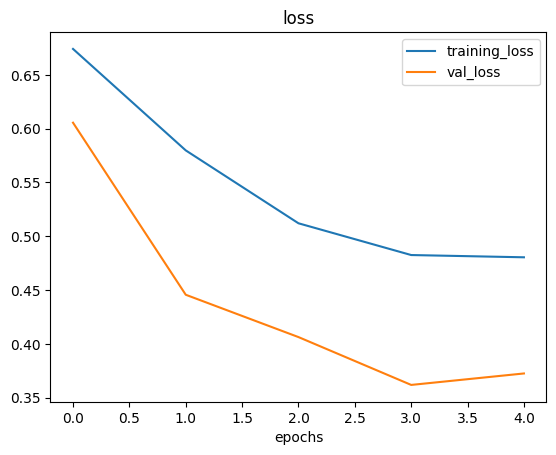

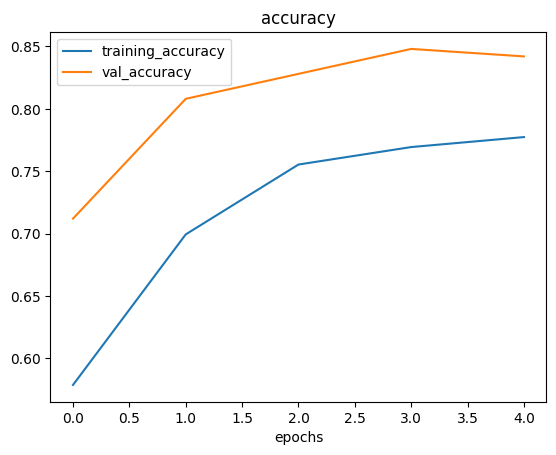

In [ ]:
#Plot loss curves
plot_loss_curves(history_7)

🔑 ** Note:** When shuffling training data , the model gets exposed to all different kinds of data, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time, instead of just pizza then steak).

### 7. Repeat until staisfied

Since we've beaten our baseline, there are still options to improve our model:
* Increase the number of model layers (e.g. add more Conv2D/MaxPool2D layers)
* Increase the number of filters in each convolutional layer(e.g. from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find ideal learning rate
* Get more data (Give model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

🧰 **Practice:** Recreate the model on the CNN Explainer website (same as model_1), and see how it performs on the augmented shuffled training data.


In [ ]:
model_8 = Sequential([
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 30s 540ms/step - loss: 0.6320 - accuracy: 0.6407 - val_loss: 0.4239 - val_accuracy: 0.8300
Epoch 2/10
47/47 [==============================] - 23s 499ms/step - loss: 0.5269 - accuracy: 0.7440 - val_loss: 0.3849 - val_accuracy: 0.8320
Epoch 3/10
47/47 [==============================] - 28s 601ms/step - loss: 0.4879 - accuracy: 0.7800 - val_loss: 0.3939 - val_accuracy: 0.8320
Epoch 4/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5025 - accuracy: 0.7620 - val_loss: 0.3181 - val_accuracy: 0.8580
Epoch 5/10
47/47 [==============================] - 23s 481ms/step - loss: 0.4354 - accuracy: 0.8100 - val_loss: 0.3603 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 23s 490ms/step - loss: 0.4415 - accuracy: 0.7987 - val_loss: 0.3144 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4335 - accuracy: 0.8040 - val_loss: 0.3134 - val_accuracy: 0.8700

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

--2023-08-22 19:25:09--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg [following]
--2023-08-22 19:25:09--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2023-08-22 19:25:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com 

In [ ]:
!ls

'03-steak (3).jpeg'	   drive	 pizza_steak.zip
'03-steak.jpeg?raw=true'   pizza_steak	 sample_data


In [ ]:
import os
print (os.listdir('/content/sample_data'))

['anscombe.json', 'README.md', '.ipynb_checkpoints', '03_steak.jpeg', 'california_housing_test.csv', 'mnist_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv']


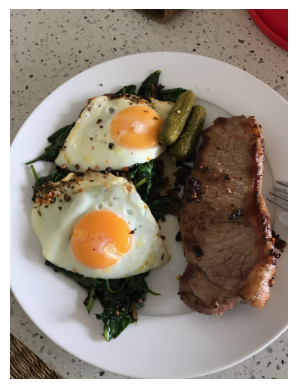

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

steak = img = mpimg.imread('/content/03-steak.jpeg?raw=true')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

🔑**Note:** When training a neural network and you want to make a prediction with it with your own custom data, it's important that this data is preprocessed into the same format as the data your model was trained on.  

In [ ]:
# Create a function to import an image & resize it to be used with our model
def load_and_prep_image(steak, img_shape=224):
  """
  Reads an image from filename, & turns it into a tensor & reshapes it to (img_shape, img_shape, color_channels).
  """

  #Read in the image
  img = tf.io.read_file(steak)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get values between 0 & 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("/content/03-steak.jpeg?raw=true")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 22ms/step


array([[0.92029643]], dtype=float32)

Custom image has been put through our model, however, it currently outputs a prediction probability, thus we need to visualize the image and it's prediction.

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability & indexing it on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, steak, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model,
  and plots the image with predicted class as the title.
  """
  # Import target image and preprocess it
  img = load_and_prep_image(steak)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 75ms/step


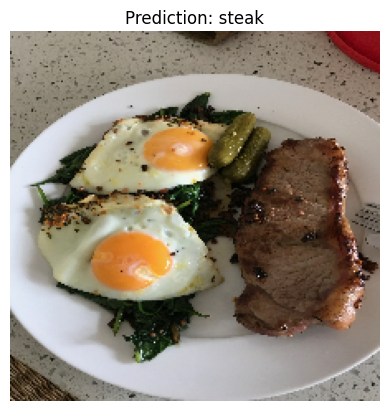

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "/content/03-steak.jpeg?raw=true")

Our model works, let's try on another image... This time, pizza 🍕

--2023-08-22 19:29:35--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg [following]
--2023-08-22 19:29:35--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2023-08-22 19:29:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

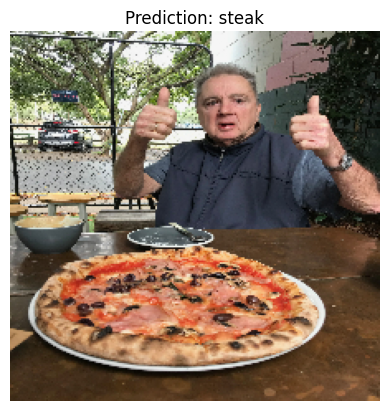

In [ ]:
# Download another test custom image & make a prediction
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
pred_and_plot(model_7,"/content/03-pizza-dad.jpeg?raw=true" )


# Multi-Class Image Classification

We've just been through a bunch of these steps with a binary classification problem, (pizza vs. steak), now we're going to use 10 classes of food(Multi-class classification).

1. Become one with the data.
2. Preprocess the data (get it model ready).
3. Create a model (start with a baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust different hyperparameters & improve the model (try to beat baaseline/ reduce overfitting).
7. Repeat until satisfied


# 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-22 19:29:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 142.250.159.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   250MB/s    in 2.0s    

2023-08-22 19:29:53 (250 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Go through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [ ]:
!ls 10_food_classes_all_data/

test  train


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['406390.jpg']
Image Shape:(306, 512, 3)


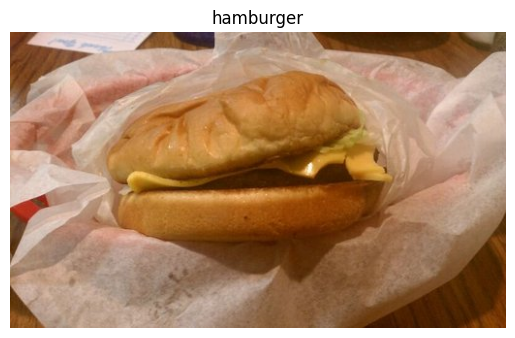

In [ ]:
# Visualise, Visualise, Visualise
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))


### 2. Preprocess the data (prepare it for model)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="categorical", # Type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Create train and test generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

### 3. Create a model (start with a baseline)

We can use the CNN explainer website's model, which also has 10 classes and use it for our problem.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


model_9= Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation= "softmax") # Changed to have 10 output neurons & changed to softmax instead of sigmoid

])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 32s 129ms/step - loss: 2.1418 - accuracy: 0.2153 - val_loss: 2.0106 - val_accuracy: 0.2856
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.9657 - accuracy: 0.3096 - val_loss: 1.9120 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.7057 - accuracy: 0.4183 - val_loss: 1.8547 - val_accuracy: 0.3608
Epoch 4/5
235/235 [==============================] - 29s 123ms/step - loss: 1.1887 - accuracy: 0.6101 - val_loss: 2.2101 - val_accuracy: 0.3056
Epoch 5/5
235/235 [==============================] - 34s 143ms/step - loss: 0.5419 - accuracy: 0.8313 - val_loss: 3.1699 - val_accuracy: 0.2752


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 9s 112ms/step - loss: 3.1699 - accuracy: 0.2752


[3.1698977947235107, 0.2752000093460083]

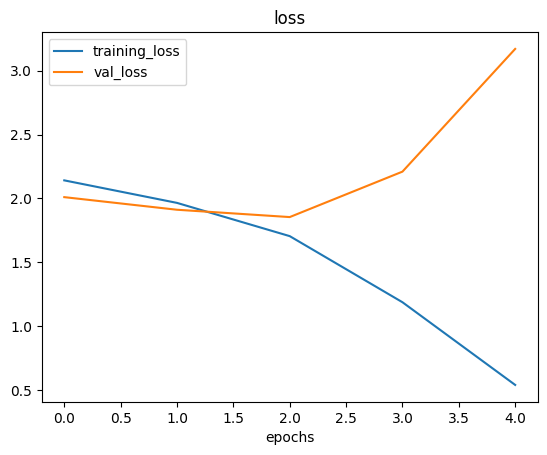

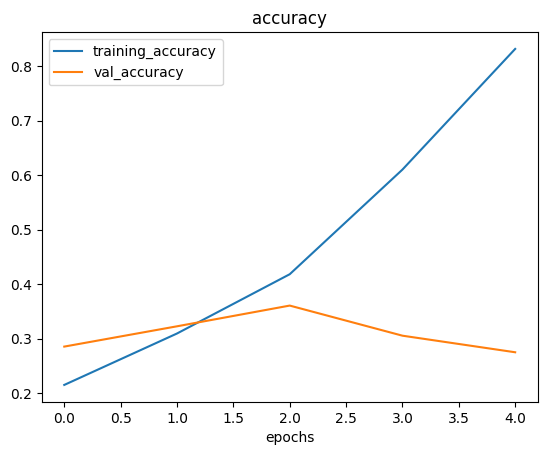

In [ ]:
# Get loss curves on 10 classes
plot_loss_curves(history_9)

It seems our model is **overfitting** the training set quite badly, thus getting great results with the training data, but fails to generalise well to unseen data. It performs poorly on the test data set.

### 6. Adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

Let's try and fix overfitting by:

* **Get more data** - give model more opportunity to learn diverse patterns.
* **Simplify the model** - reduce number of layers or reduce no. of hidden units in layers.
* **Use data augmentation** - this manipulates the training data so it has more diversity(without altering original data).
* **Use transfer learning** - leverages the patterns another model has learned on similar data to yours and allows the use of those patterns on your own dataset.

In [ ]:
# Let's try simplifying the model (remove 2 convolutional layers)

model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])



In [ ]:
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 118ms/step - loss: 2.2076 - accuracy: 0.2277 - val_loss: 1.9757 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 27s 117ms/step - loss: 1.8596 - accuracy: 0.3600 - val_loss: 1.9081 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 32s 137ms/step - loss: 1.5771 - accuracy: 0.4732 - val_loss: 2.0926 - val_accuracy: 0.2992
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 1.2238 - accuracy: 0.5957 - val_loss: 2.1881 - val_accuracy: 0.2988
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.8162 - accuracy: 0.7449 - val_loss: 2.4050 - val_accuracy: 0.2928


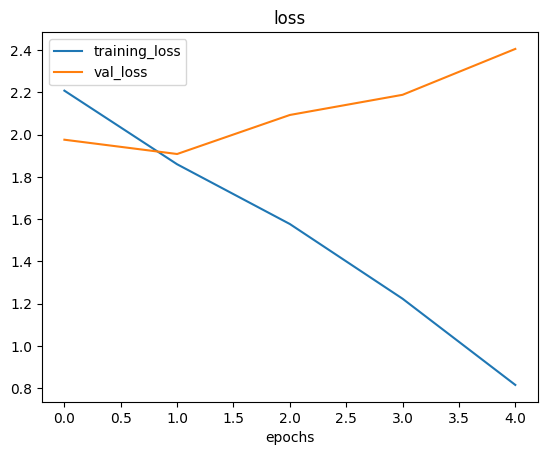

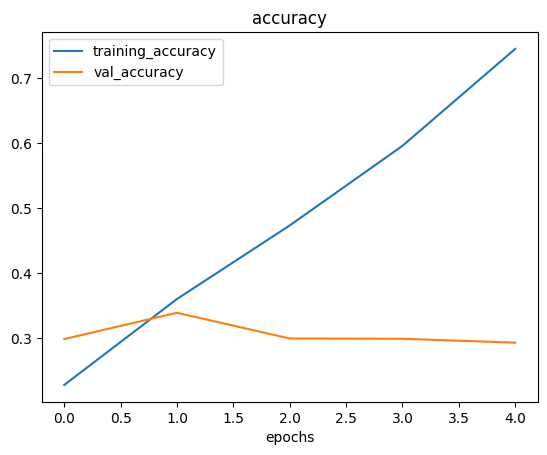

In [ ]:
# Plot loss curves
plot_loss_curves(history_10)

In [ ]:
model_10.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 29160)             0         
                                                                 
 dense_22 (Dense)            (None, 10)              

Simplifying didnt't work, accuracy went down and overfitting continued.Therefore let's try data augmentation.

### Trying to reduce overfitting with data augmentation

Let's use augmented training data to improve our model by:

* Reduce overfitting - (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True) # Shuffle data this time




Augmented training data:
Found 7500 images belonging to 10 classes.


In [ ]:
# Create model fitting on augmented training data

model_11 = tf.keras.models.clone_model(model_9)

# Compile cloned model (same setup as previous models)

model_11.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
history_11 = model_11.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 109s 449ms/step - loss: 2.2196 - accuracy: 0.1684 - val_loss: 2.1177 - val_accuracy: 0.2152
Epoch 2/5
235/235 [==============================] - 109s 464ms/step - loss: 2.1332 - accuracy: 0.2113 - val_loss: 2.0659 - val_accuracy: 0.2572
Epoch 3/5
235/235 [==============================] - 105s 449ms/step - loss: 2.0890 - accuracy: 0.2480 - val_loss: 2.0434 - val_accuracy: 0.2620
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0562 - accuracy: 0.2563 - val_loss: 1.9856 - val_accuracy: 0.2928
Epoch 5/5
235/235 [==============================] - 107s 455ms/step - loss: 2.0004 - accuracy: 0.2949 - val_loss: 1.8457 - val_accuracy: 0.3524


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 8s 100ms/step - loss: 1.5218 - accuracy: 0.4539


[1.5217695236206055, 0.45392006635665894]

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 6s 82ms/step - loss: 1.8457 - accuracy: 0.3524


[1.8456894159317017, 0.352400004863739]

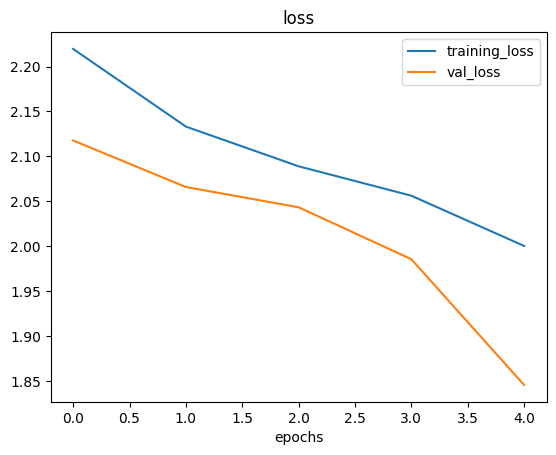

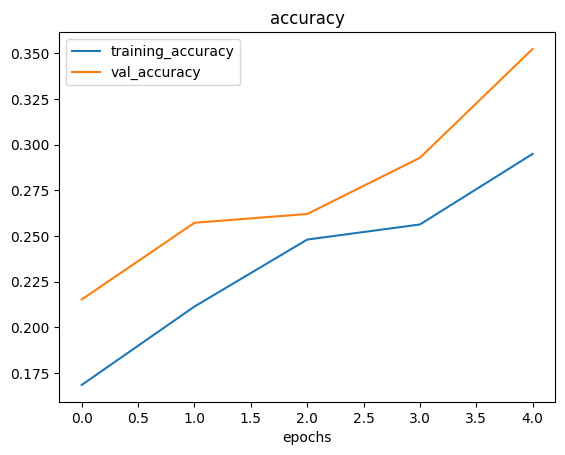

In [ ]:
# Check out loss curves for augmented trained model
plot_loss_curves(history_11)

That looks much better, the loss curves are much closer to each other than prior models, following the same direction as well, therefore if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

Can keep trying to improve model by:

* restructuring the model's architecture
* adjust learning rate
* try different methods of data augmentation (adjust the hyperparameters in ImageDataGenerator instance)
* Training for longer (more epochs)
* Try transfer learning

### Make a prediction with our trained model

Let's make predictions using our model on our own custom images.


In [ ]:
# Reminder of our class names:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true

--2023-08-22 19:50:25--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-hamburger.jpeg [following]
--2023-08-22 19:50:25--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-hamburger.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg [following]
--2023-08-22 19:50:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

In [ ]:
# Reconfigure pred_and_plot function to work with multi-class images

def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model,
  and plots the image with predicted class as the title.
  """
  # Import target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multiclass & get pred class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 362ms/step


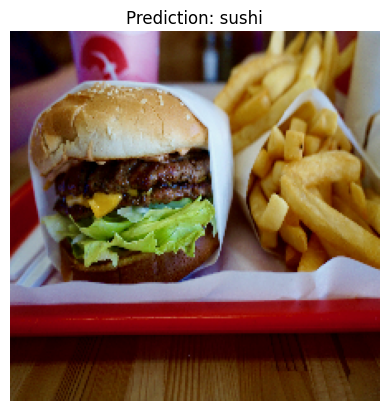

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-hamburger.jpeg?raw=true",
              class_names=class_names)

1/1 [==============================] - 0s 64ms/step


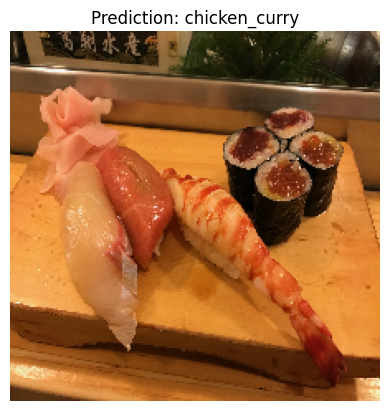

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-sushi.jpeg?raw=true",
              class_names=class_names)

1/1 [==============================] - 0s 33ms/step


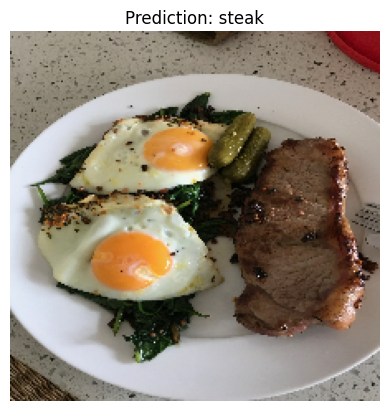

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg?raw=true",
              class_names=class_names)

1/1 [==============================] - 0s 36ms/step


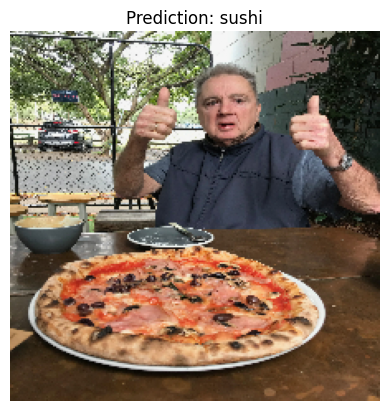

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-pizza-dad.jpeg?raw=true",
              class_names=class_names)

1/1 [==============================] - 0s 95ms/step


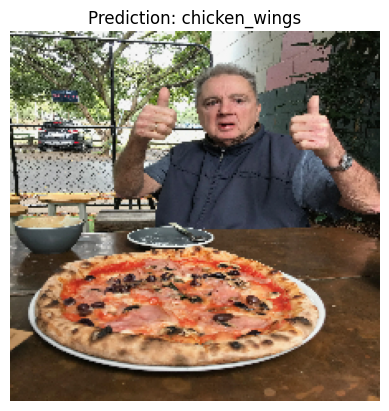

In [ ]:
# Our updated pred_and_plot function works for binary classification too.
pred_and_plot(model=model_3,
              filename="03-pizza-dad.jpeg?raw=true", #trained on pizza and steak
              class_names=class_names)
# Seems to be a running error with pizza and steak images. Maybe if used other ones that dont have so many copies.

Looks like our model didn't perform well on our custom images.This is because is only achieved 39% accuracy on the test data.So it can thus function quite poorly on unseen data.

## Saving and Loading our model


In [ ]:
# Saving our model
model_11.save("saved_trained_model_11")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 7s 93ms/step - loss: 1.8457 - accuracy: 0.3524


[1.845689296722412, 0.352400004863739]

In [ ]:
# Compare our loaded model to existing model
model_11.evaluate(test_data)

79/79 [==============================] - 6s 80ms/step - loss: 1.8457 - accuracy: 0.3524


[1.845689058303833, 0.352400004863739]